In [1]:
from sampling import *
from feature_extracter import *
from sklearn.preprocessing import StandardScaler
from ML_models import *
import preprocess_data

2025-03-16 16:43:21.894467: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 16:43:21.898220: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-16 16:43:21.906941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742139801.921198   64103 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742139801.924926   64103 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742139801.936867   64103 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('task/train_set/x_train_aggregated.csv') # Replace with your file path
x = df.drop(columns=['AccountID'])
y_df = pd.read_csv('task/train_set/y_train.csv')
# df['Fraudster'] = y_df['Fraudster']
xy_train = pd.merge(df, y_df, on='AccountID', how='inner')

df_val = pd.read_csv('task/validation_set/x_val_aggregated.csv')
x_val = df_val.drop(columns=['AccountID'])
yval_df = pd.read_csv('task/validation_set/y_val.csv')
# df_val['Fraudster'] = yval_df['Fraudster']
xy_val = pd.merge(df_val, yval_df, on='AccountID', how='inner')
# y_val = yval_df['Fraudster']
# Display the first few rows
# print(df.head())

test_df = pd.read_csv('task/test_set/x_test.csv')
test_agg_df = pd.read_csv('task/test_set/x_test_aggregated.csv')

# Check the distribution of the target variable (Fraudster)
# print(df_val['Fraudster'].value_counts())

In [3]:
xtrain_df = pd.read_csv('task/train_set/x_train.csv')
x_val_df = pd.read_csv('task/validation_set/x_val.csv')


In [20]:
feature_extractor = FraudDetectionFeatureExtractor(x_val_df)

aggregated_features = feature_extractor.extract_all_features()


In [21]:
aggregated_features.head()

,HourOfDay_mean,BalanceDeviation_mean,TransactionBurstiness_mean,IsExternalAccount_sum,ExternalAccountFrequency_mean,isUnauthorizedOverdraft_sum,RollingTransactionCount_mean
AccountID,,,,,,,
C0000718635,16.222222,-1.034803e-10,0.000000,3,12.666667,0,5.000000
C0000998488,17.014286,2.893752e-10,8.185714,18,538.777778,0,9.357143
C0002560075,17.932203,3.157026e-10,7.915254,18,13.111111,0,9.237288
C0002950071,16.125000,1.164153e-10,0.000000,5,1879.800000,0,4.500000
C0003399346,17.950820,-3.053517e-11,7.721311,37,288.810811,4,9.262295


In [22]:
aggregated_features.to_csv('X_val_aggregated_features2.csv', index=True)

In [ ]:
feature_extractor1 = FraudDetectionFeatureExtractor(xtrain_df)
df_fe = feature_extractor1.extract_all_features()
# df_fe = aggregated_features
df_fea2 = pd.merge(df, df_fe, on='AccountID', how='inner')  # 'inner', 'left', 'right', or 'outer'
# df_fea['Fraudster'] = y_df['Fraudster']
df_fea = pd.merge(df_fea2, y_df, on='AccountID', how='inner')
print("df_train_fea shape:", df_fea.shape)


feature_extractor2 = FraudDetectionFeatureExtractor(x_val_df)
df_val_fe = feature_extractor2.extract_all_features()
df_val_fea2 = pd.merge(df_val, df_val_fe, on='AccountID', how='inner') 
# df_val_fea['Fraudster'] = yval_df['Fraudster']
df_val_fea = pd.merge(df_val_fea2, yval_df, on='AccountID', how='inner')
print("df_val_fea shape:", df_val_fea.shape)

feature_extractor3 = FraudDetectionFeatureExtractor(test_df)
df_test_fe = feature_extractor3.extract_all_features()
df_test_fea = pd.merge(test_agg_df, df_test_fe, on='AccountID', how='inner') 
print("df_test_fea shape:", df_test_fea.shape)

df_train_fea shape: (11061, 21)
df_val_fea shape: (11060, 21)
df_test_fea shape: (11060, 20)


In [32]:
# df_fea = df_fea.dropna(axis=1)
# df_val_fea = df_val_fea.dropna(axis=1)
for column in df_fea.columns:
    if df_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_fea[column] = df_fea[column].fillna(df_fea[column].mean())

for column in df_val_fea.columns:
    if df_val_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_val_fea[column] = df_val_fea[column].fillna(df_val_fea[column].mean())

for column in df_test_fea.columns:
    if df_test_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_test_fea[column] = df_test_fea[column].fillna(df_test_fea[column].mean())

for column in df_fe.columns:
    if df_fe[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_fe[column] = df_fe[column].fillna(df_fe[column].mean())


In [33]:
# print(df_fea.isnull().sum())
print(df_test_fea.isnull().sum())

AccountID                        0
NumTransactions                  0
AvgAmount                        0
MaxAmount                        0
TotalIn                          0
MaxIn                            0
TotalOut                         0
MaxCashOut                       0
MaxDebit                         0
MaxTransfer                      0
MaxPayment                       0
MaxFreqH                         0
MaxFreqD                         0
HourOfDay_mean                   0
BalanceDeviation_mean            0
TransactionBurstiness_mean       0
IsExternalAccount_sum            0
ExternalAccountFrequency_mean    0
isUnauthorizedOverdraft_sum      0
RollingTransactionCount_mean     0
dtype: int64


In [2]:
df_fea, df_val_fea, df_test_fea = preprocess_data.preprocess_and_extract_features()
print("Training Data:", df_fea.head())
print("Validation Data:", df_val_fea.head())
print("Test Data:", df_test_fea.head())

df_train_fea shape: (11061, 21)
df_val_fea shape: (11060, 21)
df_test_fea shape: (11060, 20)
Training Data:      AccountID  NumTransactions      AvgAmount   MaxAmount      TotalIn  \
0  C0001143040              562  146658.532989  3585064.01  35124031.74   
1  C0001332727              178  128888.997753   903276.53  13396604.25   
2  C0002641069               56  146342.356786  2571512.49   4547603.60   
3  C0002967890              103  117303.432330  3554689.54   3016367.57   
4  C0003513711               50  144333.040800  1563406.66   4462829.33   

       MaxIn     TotalOut  MaxCashOut  MaxDebit  MaxTransfer  ...  MaxFreqH  \
0  424498.32  47298063.80   284531.00   8893.26   3585064.01  ...        12   
1  341238.53   9545637.35   258056.33      0.00    903276.53  ...         6   
2  293992.40   3647568.38   204095.40   3594.16   2571512.49  ...         2   
3  392633.82   9065885.96   247445.60  23100.20   3554689.54  ...         4   
4  264727.14   2753822.71   142728.98   3080.3

In [4]:
df_fea.head()

,AccountID,NumTransactions,AvgAmount,MaxAmount,TotalIn,MaxIn,TotalOut,MaxCashOut,MaxDebit,MaxTransfer,...,MaxFreqH,MaxFreqD,HourOfDay_mean,BalanceDeviation_mean,TransactionBurstiness_mean,IsExternalAccount_sum,ExternalAccountFrequency_mean,isUnauthorizedOverdraft_sum,RollingTransactionCount_mean,Fraudster
0,C0001143040,562,146658.532989,3585064.01,35124031.74,424498.32,47298063.80,284531.00,8893.26,3585064.01,...,12,84,17.583630,-2.038304e-10,211.339858,182,1252.549451,0,9.919929,0
1,C0001332727,178,128888.997753,903276.53,13396604.25,341238.53,9545637.35,258056.33,0.00,903276.53,...,6,33,17.174157,-2.262905e-10,40.780899,42,14.119048,0,9.747191,0
2,C0002641069,56,146342.356786,2571512.49,4547603.60,293992.40,3647568.38,204095.40,3594.16,2571512.49,...,2,8,17.910714,1.372038e-10,1.946429,16,4529.437500,0,9.196429,1
3,C0002967890,103,117303.432330,3554689.54,3016367.57,392633.82,9065885.96,247445.60,23100.20,3554689.54,...,4,22,17.378641,-1.537134e-10,17.271845,52,2224.230769,0,9.563107,0
4,C0003513711,50,144333.040800,1563406.66,4462829.33,264727.14,2753822.71,142728.98,3080.34,1563406.66,...,2,8,16.620000,8.381903e-11,4.040000,7,701.142857,0,9.100000,0


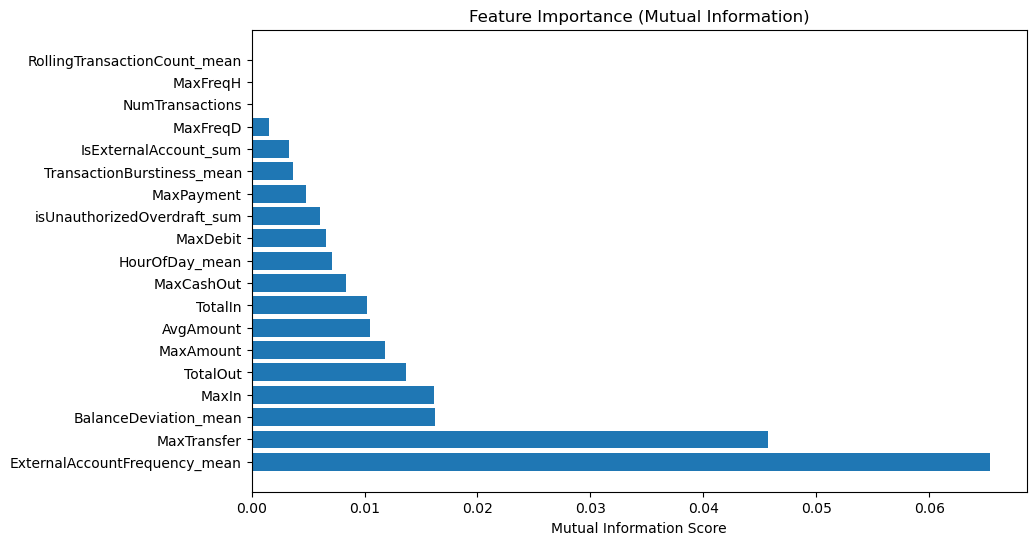

Top Features (Mutual Information): ['ExternalAccountFrequency_mean', 'MaxTransfer', 'BalanceDeviation_mean', 'MaxIn', 'TotalOut', 'MaxAmount', 'AvgAmount', 'TotalIn', 'MaxCashOut', 'HourOfDay_mean']


In [10]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# df_fe3 = pd.merge(df_fe, df, on='AccountID', how='inner')
X = df_fea.drop(columns=['AccountID','Fraudster'])
y = df_fea['Fraudster']

x_val = df_val_fea.drop(columns=['AccountID','Fraudster'])
y_val = df_val_fea['Fraudster']

X_test = df_test_fea.drop(columns=['AccountID'])

# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Plot the MI scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Mutual Information)')
plt.show()

# Select top k features
k = 10 # Number of top features to select
top_features_mi = mi_df['Feature'][:k].tolist()
print("Top Features (Mutual Information):", top_features_mi)

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

# Fit the model
model.fit(X, y)

# Get coefficients
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Select features with non-zero coefficients
selected_features_l1 = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
print("Selected Features (L1 Regularization):", selected_features_l1)

Selected Features (L1 Regularization): ['RollingTransactionCount_mean', 'NumTransactions', 'IsExternalAccount_sum', 'MaxIn', 'MaxAmount', 'MaxCashOut', 'TotalIn', 'TotalOut', 'MaxTransfer', 'MaxDebit', 'AvgAmount', 'MaxPayment', 'ExternalAccountFrequency_mean', 'TransactionBurstiness_mean', 'isUnauthorizedOverdraft_sum', 'MaxFreqD', 'MaxFreqH', 'HourOfDay_mean']


In [ ]:
# Combine selected features from all methods
selected_features = list(set(top_features_mi ))


# Find common features between the two lists
# selected_features = list(set(top_features_mi).intersection(selected_features_l1))
print("Final Selected Features:", selected_features)

Final Selected Features: ['AvgAmount', 'MaxTransfer', 'MaxAmount', 'MaxIn', 'BalanceDeviation_mean', 'TotalOut', 'MaxCashOut', 'TotalIn', 'ExternalAccountFrequency_mean', 'HourOfDay_mean']


In [ ]:
# selected_features = top_features_mi + x.columns.tolist()
selected_features

['AvgAmount',
 'MaxTransfer',
 'MaxAmount',
 'MaxIn',
 'BalanceDeviation_mean',
 'TotalOut',
 'MaxCashOut',
 'TotalIn',
 'ExternalAccountFrequency_mean',
 'HourOfDay_mean']

In [ ]:
# Select columns from the DataFrame
df_fea_con = df_fea[selected_features + ['AccountID', 'Fraudster']]

df_val_fea_con = df_val_fea[selected_features+ ['AccountID', 'Fraudster']]

X = df_fea[selected_features]
y = df_fea[ 'Fraudster']

x_val = df_val_fea_con[selected_features]
y_val = df_val_fea['Fraudster']

X_test = df_test_fea[selected_features]

In [11]:
import numpy as np
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# print(X_test[X_test > 1e10].count())

In [ ]:
# print(X_test.describe())

In [12]:
# Initialize the MLModels class
ml_models = MLModels(X, y, x_val, y_val)

# Train and evaluate models
# ml_models.logistic_regression()

In [ ]:
# ml_models.decision_tree()

Confusion Matrix:
 [[9089  319]
 [1036  616]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      9408
           1       0.66      0.37      0.48      1652

    accuracy                           0.88     11060
   macro avg       0.78      0.67      0.70     11060
weighted avg       0.86      0.88      0.86     11060

ROC-AUC Score: 0.8786696011637101


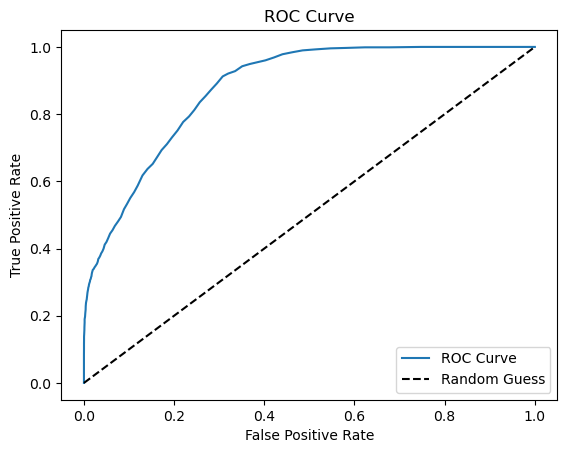

In [13]:
ml_models.random_forest()

In [ ]:
# ml_models.gradient_boosting()

In [ ]:
# ml_models.knn()

In [ ]:
# ml_models.svm()

In [ ]:
# ml_models.naive_bayes()

Confusion Matrix:
 [[8831  577]
 [ 903  749]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      9408
           1       0.56      0.45      0.50      1652

    accuracy                           0.87     11060
   macro avg       0.74      0.70      0.71     11060
weighted avg       0.86      0.87      0.86     11060

ROC-AUC Score: 0.8889517936411854


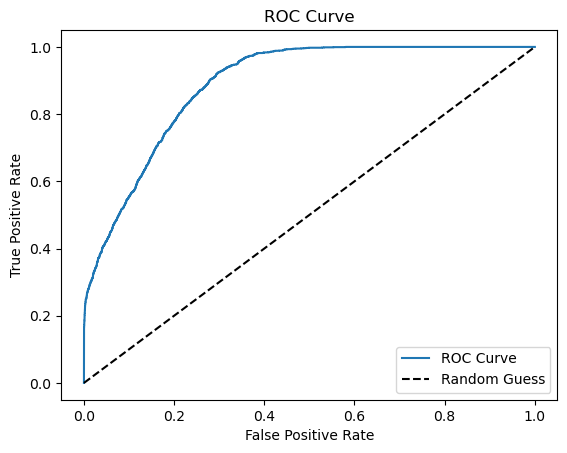

In [14]:
ml_models.xgboost()

[LightGBM] [Info] Number of positive: 1738, number of negative: 9323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 11061, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157129 -> initscore=-1.679749
[LightGBM] [Info] Start training from score -1.679749
Confusion Matrix:
 [[8944  464]
 [ 933  719]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      9408
           1       0.61      0.44      0.51      1652

    accuracy                           0.87     11060
   macro avg       0.76      0.69      0.72     11060
weighted avg       0.86      0.87      0.86     11060

ROC-AUC Score: 0.8978862845077499


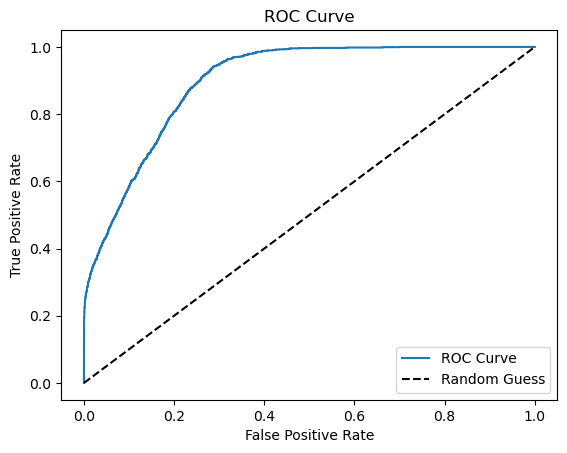

In [ ]:
ml_models.lightgbm()

In [ ]:
# from sklearn.ensemble import VotingClassifier

# # Initialize the two models
# model1 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model2 = GaussianNB()  # Model with high accuracy for class 1

# # Create a Voting Classifier
# voting_clf = VotingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], voting='soft')  # Use 'soft' for weighted probabilities

# # Train the Voting Classifier
# voting_clf.fit(X, y)

# # Evaluate the Voting Classifier
# y_pred = voting_clf.predict(x_val)
# y_pred_proba = voting_clf.predict_proba(x_val)[:, 1]
# ml_models.evaluate_model(y_val, y_pred, y_pred_proba)

In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# # Initialize the two models
# model1 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model2 = GaussianNB()  # Model with high accuracy for class 1

# # Create a Stacking Classifier
# stacking_clf = StackingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], final_estimator=LogisticRegression())

# # Train the Stacking Classifier
# stacking_clf.fit(X, y)

# # Evaluate the Stacking Classifier
# y_pred = stacking_clf.predict(x_val)
# y_pred_proba = stacking_clf.predict_proba(x_val)[:, 1]
# ml_models.evaluate_model(y_val, y_pred, y_pred_proba)

In [ ]:
# model11 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model21 = GaussianNB()  # Model with high accuracy for class 1
# model11.fit(X,y)
# model21.fit(X,y)

# # Get predicted probabilities from both models
# y_pred_proba1 = model11.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 1
# y_pred_proba2 = model21.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 2

# # # Combine probabilities using a weighted average
# # weight1 = 0.1  # Weight for model 1
# # weight2 = 0.8  # Weight for model 2
# # combined_proba = (weight1 * y_pred_proba1) + (weight2 * y_pred_proba2)

# # # Convert probabilities to binary predictions
# # y_pred_combined = (combined_proba > 0.7).astype(int)


# # Define a custom combination rule
# y_pred_combined = []
# for pred1, pred2 in zip(y_pred_proba1, y_pred_proba2):
#     if pred1 == 0 and pred2 == 1:
#         y_pred_combined.append(1)  # Classify as class 1
#     elif pred1 == 1 and pred2 == 0:
#         y_pred_combined.append(0)  # Classify as class 0
#     else:
#         y_pred_combined.append(pred1)  # Default to Model 1's prediction


# # Evaluate the combined predictions
# ml_models.evaluate_model(y_val, y_pred_combined)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model11 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model21 = GaussianNB()  # Model with high accuracy for class 1
# model11.fit(X,y)
# model21.fit(X,y)

# # Get predicted probabilities from both models
# y_pred_proba1 = model11.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 1
# y_pred_proba2 = model21.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 2

# # Combine probabilities into a new feature matrix
# X_blend = pd.DataFrame({'Model1_Proba': y_pred_proba1, 'Model2_Proba': y_pred_proba2})

# # Train a blending model (e.g., Logistic Regression)
# blending_model = LogisticRegression()
# blending_model.fit(X_blend, y_val)

# # Make predictions using the blending model
# y_pred_blend = blending_model.predict(X_blend)
# y_pred_proba_blend = blending_model.predict_proba(X_blend)[:, 1]

# # Evaluate the blending model
# ml_models.evaluate_model(y_val, y_pred_blend, y_pred_proba_blend)

In [15]:
fraud_detector = FraudDetection(df_fea,df_val_fea)

# input_shape = X_unde.shape[1]  # Number of features
# model = build_nn_model(input_shape)
# Compare all approaches
# fraud_detector.compare_approaches()

In [ ]:
# fraud_detector = FraudDetection(df_fea_con,df_val_fea_con)
# fraud_detector.preprocess_data()
# scaler = StandardScaler()


# # Generate oversampled data
# X_train_smote, y_train_smote = fraud_detector.oversample_data()
# X_scaled = scaler.fit_transform(x_val)
# x_val = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns)
# input_shape = X_train_smote.shape[1]
# # Train and evaluate the model using oversampled data
# fraud_detector.NN_train_and_evaluate_model(input_shape,X_train_smote, y_train_smote, x_val, y_val, "Oversampling (SMOTE)",epochs=50, batch_size=32)

In [16]:
fraud_detector = FraudDetection(df_fea,df_val_fea)
fraud_detector.preprocess_data()
scaler = StandardScaler()


# Generate oversampled data
X_train_smote, y_train_smote = fraud_detector.oversample_data()
X_scaled = scaler.fit_transform(x_val)
x_val = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns)
input_shape = X_train_smote.shape[1]

model_N = fraud_detector.build_nn_model(input_shape)
model_NN = fraud_detector.build_nn_dense_model(input_shape)
history1 = model_N.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
history2 = model_NN.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
y_pred_smote_N = model_N.predict(x_val)

y_pred_smote_NN = model_NN.predict(x_val)

X_train_under, y_train_under = fraud_detector.undersample_data()
input_shape = X_train_under.shape[1]
model_NU = fraud_detector.build_nn_model(input_shape)
model_NNU = fraud_detector.build_nn_dense_model(input_shape)
history1U = model_NU.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
history2U = model_NNU.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
y_pred_under_NU = model_NU.predict(x_val)

y_pred_under_NNU = model_NNU.predict(x_val)


Epoch 1/30


/home/zoro/anaconda3/envs/bbdc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-16 19:33:45.612018: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-03-16 19:33:45.612053: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-03-16 19:33:45.612059: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: luffy
2025-03-16 19:33:45.612061: I external/local_xla

583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.5997 - loss: 0.6656
Epoch 2/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7088 - loss: 0.5677
Epoch 3/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7511 - loss: 0.5154
Epoch 4/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7855 - loss: 0.4661
Epoch 5/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8012 - loss: 0.4380
Epoch 6/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8013 - loss: 0.4393
Epoch 7/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8059 - loss: 0.4237
Epoch 8/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8095 - loss: 0.4114
Epoch 9/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8157 - loss: 0.4053
Epoch 10/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8138 - loss: 0.4151
Epoch 11/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8205 - loss: 0.3957
Epoch 12/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 

/home/zoro/anaconda3/envs/bbdc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/zoro/anaconda3/envs/bbdc/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.5839 - loss: 0.6753
Epoch 2/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7015 - loss: 0.5768
Epoch 3/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.7602 - loss: 0.5083
Epoch 4/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7836 - loss: 0.4782
Epoch 5/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.7939 - loss: 0.4451
Epoch 6/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8026 - loss: 0.4292
Epoch 7/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8070 - loss: 0.4209
Epoch 8/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.8122 - loss: 0.4107
Epoch 9/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8168 - loss: 0.3981
Epoch 10/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8151 - loss: 0.4015
Epoch 11/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.8202 - loss: 0.3895
Epoch 12/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 

Confusion Matrix:
 [[6402 3006]
 [  95 1557]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81      9408
           1       0.34      0.94      0.50      1652

    accuracy                           0.72     11060
   macro avg       0.66      0.81      0.65     11060
weighted avg       0.89      0.72      0.76     11060

ROC-AUC Score: 0.8657147180906261


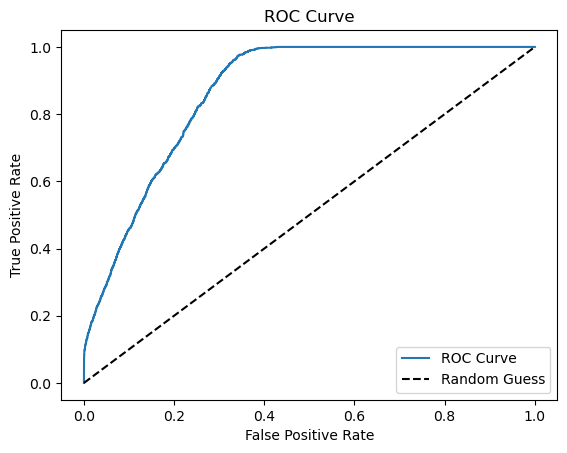

Confusion Matrix:
 [[5946 3462]
 [  42 1610]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77      9408
           1       0.32      0.97      0.48      1652

    accuracy                           0.68     11060
   macro avg       0.66      0.80      0.63     11060
weighted avg       0.89      0.68      0.73     11060

ROC-AUC Score: 0.8494406066754787


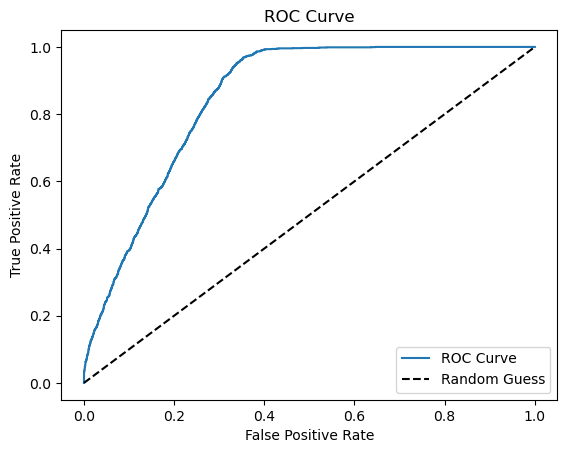

Confusion Matrix:
 [[6353 3055]
 [  87 1565]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80      9408
           1       0.34      0.95      0.50      1652

    accuracy                           0.72     11060
   macro avg       0.66      0.81      0.65     11060
weighted avg       0.89      0.72      0.76     11060

ROC-AUC Score: 0.8652867169870369


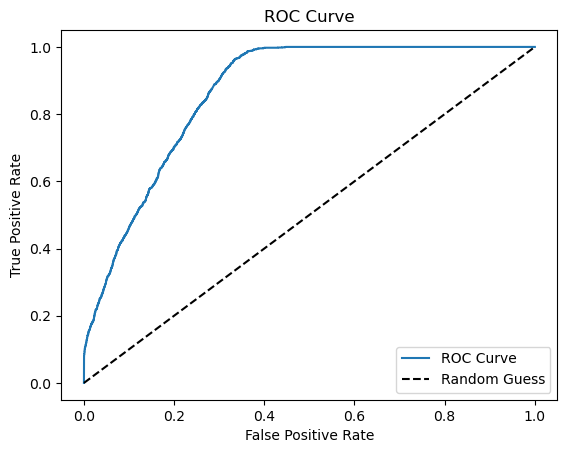

Confusion Matrix:
 [[6146 3262]
 [  53 1599]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79      9408
           1       0.33      0.97      0.49      1652

    accuracy                           0.70     11060
   macro avg       0.66      0.81      0.64     11060
weighted avg       0.89      0.70      0.74     11060

ROC-AUC Score: 0.8504306970215447


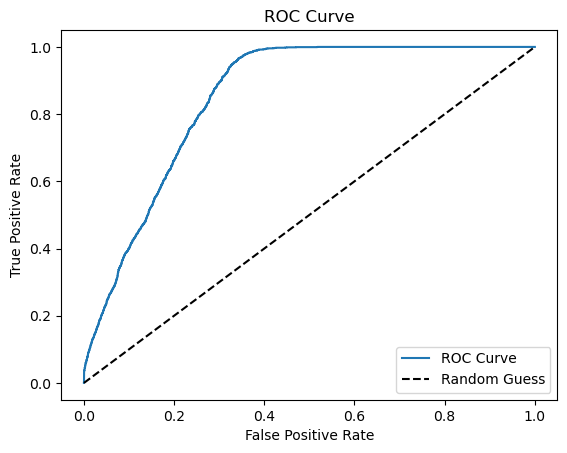

In [17]:
# Average the predictions
combined_proba = (y_pred_smote_N+y_pred_under_NU ) / 2

# Convert probabilities to binary predictions
y_pred_combined = (combined_proba >= 0.5).astype(int)
y_pred_combined1 = (y_pred_smote_NN >= 0.5).astype(int)
y_pred_combined2 = (y_pred_under_NU >= 0.5).astype(int)
y_pred_combined3 = (y_pred_under_NNU >= 0.5).astype(int)

# Evaluate the combined predictions
ml_models.evaluate_model(y_val, y_pred_combined, combined_proba)
ml_models.evaluate_model(y_val, y_pred_combined1, y_pred_smote_NN)
ml_models.evaluate_model(y_val, y_pred_combined2, y_pred_under_NU)
ml_models.evaluate_model(y_val, y_pred_combined3, y_pred_under_NNU)

In [ ]:
# X_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

yt_pred_smote_N = model_N.predict(X_test)
yt_pred_smote_NN = model_NN.predict(X_test)
yt_pred_under_NU = model_NU.predict(X_test)
yt_pred_under_NNU = model_NNU.predict(X_test)

346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


In [ ]:
yt_pred_smote_N

array([[7.5254405e-01],
       [2.4673835e-07],
       [7.4592972e-01],
       ...,
       [9.7845288e-05],
       [2.3763860e-06],
       [1.6949940e-08]], dtype=float32)

In [ ]:
combined_proba = (yt_pred_smote_N +  yt_pred_under_NU ) / 2

# Convert probabilities to binary predictions
y_pred_combined = (combined_proba >= 0.5).astype(int)

In [ ]:
submission_ = pd.read_csv('task/student_skeleton.csv')
submission_ = submission_.drop(columns=['Fraudster'])
# Fill the 'Fraudster' column in the skeleton file with the predicted values
df_test_fea['Fraudster'] = y_pred_combined
submission = df_test_fea[['AccountID', 'Fraudster']]
submission_df = pd.merge(submission_, submission, on='AccountID', how='inner')

# Save the updated file for submission
# submission_df.to_csv('Submission_4.csv', index=False)

In [ ]:
submission

,AccountID,Fraudster
0,C0002376176,1
1,C0002438071,0
2,C0003158357,1
3,C0004699568,0
4,C0006340080,0
...,...,...
11055,C9993354726,0
11056,C9993813142,1
11057,C9994751436,0
11058,C9995069799,0


In [ ]:
submission_df

,AccountID,Fraudster
0,C3393649433,1
1,C0855769514,0
2,C3140924771,0
3,C5919965464,0
4,C1039024463,1
...,...,...
11055,C5029683454,0
11056,C8038644826,1
11057,C4378459302,1
11058,C6334023464,0


In [ ]:
print(submission_df['Fraudster'].value_counts())

Fraudster
0    6617
1    4443
Name: count, dtype: int64
